In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import os
# print(os.listdir("../input"))

# Intro

In [ ]:
#data reading
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

#Nrows, Ncols @ train
train_df.shape

(60000, 785)

In [ ]:
train_df.shape

(60000, 785)

These are the labels in the dataset:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 

In [ ]:
label_dict = {0: 'tshirt',
              1: 'trouser',
              2: 'pullover',
              3: 'dress',
              4: 'coat',
              5: 'sandal',
              6: 'shirt',
              7: 'sneaker',
              8: 'bag',
              9: 'boot'}

In [ ]:
#header
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


# Data Visualization

In [ ]:
#plot an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def get_pixel_cols():
    """
    This function returns the pixel column names
    """
    return ['pixel' + str(i) for i in range(1, 785)]

In [ ]:
def idx_to_pixseries(df, idx):
    """
    Given a pandas dataframe, and an index, it returns the pixel series for that index
    """
    return df.iloc[idx][get_pixel_cols()]

In [ ]:
def plot_image_pd(pixels_series):
    """
    This functions plots an image, given a series with all the pixels
    """
    pix_mat = pixels_series.values.reshape(28, 28)
    imgplot = plt.imshow(pix_mat, cmap='gray')

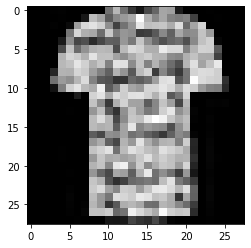

In [ ]:
plot_image_pd(idx_to_pixseries(train_df, 3))

In [ ]:
labels = train_df.label.value_counts().index.values.tolist()
labels = sorted(labels)

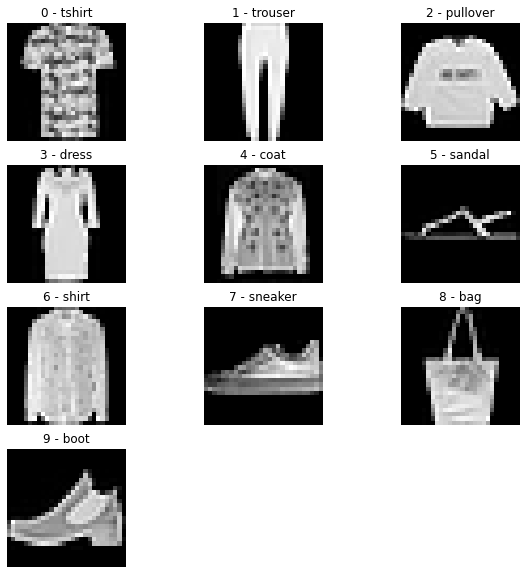

In [ ]:
plt.figure(figsize=(10,10))
plt.plot([4, 3, 11])
for lab in labels:
    ax = plt.subplot(4, 3, lab+1)
    ax.set_title(str(lab) + " - " + label_dict[lab])
    plt.axis('off')
    plot_image_pd(idx_to_pixseries(train_df, train_df[train_df.label == lab].index[0]))

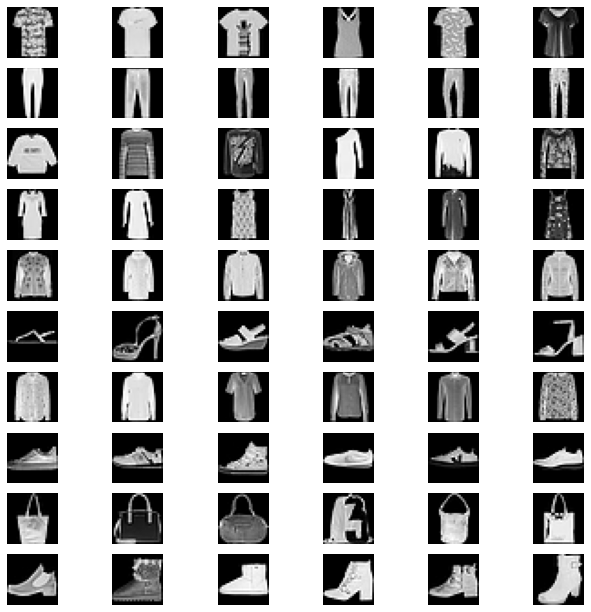

In [ ]:
#N images per row
N_im_lab = 6
N_labs = len(labels)
plt.figure(figsize=(11,11))
plt.plot([N_labs, N_im_lab, (N_im_lab * N_labs) + 1])

#for every label
for lab in labels:
    #show N_im_lab first samples
    for i in range(N_im_lab):
        ax = plt.subplot(N_labs, N_im_lab, 1 + (i + (lab*N_im_lab)))
        plt.axis('off')
        plot_image_pd(idx_to_pixseries(train_df, train_df[train_df.label == lab].index[i]))

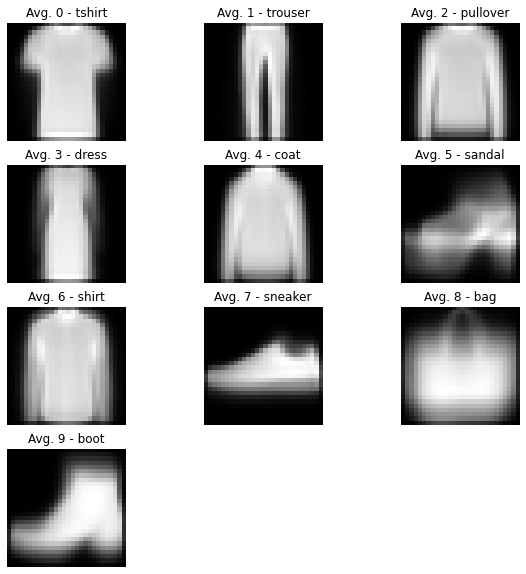

In [ ]:
plt.figure(figsize=(10,10))
plt.plot([4, 3, 11])
for lab in labels:
    ax = plt.subplot(4, 3, lab+1)
    ax.set_title("Avg. " + str(lab) + " - " + label_dict[lab])
    plt.axis('off')
    avg_pixels = train_df.loc[train_df.label == lab][get_pixel_cols()].mean()
    plot_image_pd(avg_pixels)

# Modeling

## Baseline model


In [ ]:
#normalize data, so we get values between 0 and 1
train_df[get_pixel_cols()] = train_df[get_pixel_cols()] / 255.
test_df[get_pixel_cols()] = test_df[get_pixel_cols()] / 255.

In [ ]:
#split train data in train-val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df[get_pixel_cols()], train_df.label, test_size=0.25, random_state=4)

In [ ]:
#train a logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.1, solver = 'sag')
% time lr.fit(X_train, y_train)

CPU times: user 1min 49s, sys: 24.6 ms, total: 1min 49s
Wall time: 1min 49s


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

### Baseline model evaluation

In [ ]:
#class estimation
lr_y_val_pred = lr.predict(X_val)

In [ ]:
#prints accuracy score
def print_acc(y_true, y_pred, set_str):
    print ("This model has a {0:.2f}% acc. score @ {1}".format(100*accuracy_score(y_true, y_pred), set_str))

This model has a 85.31% acc. score @ Validation


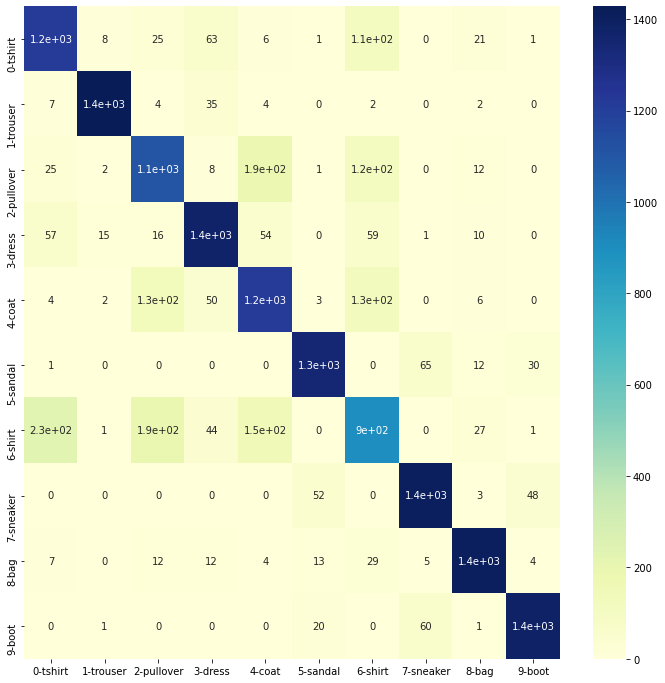

In [ ]:
#compute confusion matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

def plot_conf_matrix(y_true, y_pred, set_str):
    """
    This function plots a basic confusion matrix, and also shows the model
    accuracy score
    """
    conf_mat = confusion_matrix(y_true, y_pred)
    df_conf = pd.DataFrame(conf_mat, index = [str(l) + '-' + label_dict[l] for l in labels],
                           columns = [str(l) + '-' + label_dict[l] for l in labels])

    plt.figure(figsize = (12, 12))
    sn.heatmap(df_conf, annot=True, cmap="YlGnBu")
    
    print_acc(y_true, y_pred, set_str)

plot_conf_matrix(y_val, lr_y_val_pred, 'Validation')

This baseline model has a 85.13% accuracy score. We can see in the confusion matrix, that the main errors come from the tshirt, coat, pullover and tshirt classes. Let's now look at some of this errors closer.

In [ ]:
print_acc(y_train, lr.predict(X_train), 'Train')

This model has a 87.54% acc. score @ Train


This baseline model has a 86.64 percent accuracy in the train set, slightly better than at validation set, but it does not seem to be any overfit

### visual error inspection 

In [ ]:
def visual_err_inspection(y_true, y_pred, lab_eval, N_samples=6):
    """
    This function runs a visual error inspection. It plots two rows of images,
    the first row shows true positive predictions, while the second one shows
    flase positive predictions
    """
    
    df_y = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    idx_y_eval_tp = df_y.loc[(df_y.y_true == lab_eval) & (df_y.y_pred == lab_eval)].index.values[:N_samples]
    idx_y_eval_fp = df_y.loc[(df_y.y_true != lab_eval) & (df_y.y_pred == lab_eval)].index.values[:N_samples]
    
    plt.figure(figsize=(12,5))
    plt.plot([2, N_samples, 2*N_samples + 1])

    for i in range(N_samples):
        ax = plt.subplot(2, N_samples, i+1)
        ax.set_title("OK: " + str(lab_eval) + " - " + label_dict[lab_eval])
        plt.axis('off')
        plot_image_pd(idx_to_pixseries(train_df, idx_y_eval_tp[i]))

        ax2 = plt.subplot(2, N_samples, i+N_samples+1)
        lab_ = train_df.iloc[idx_y_eval_fp[i]].label
        ax2.set_title("KO: " + str(int(lab_)) + " - " + label_dict[lab_])
        plt.axis('off')
        plot_image_pd(idx_to_pixseries(train_df, idx_y_eval_fp[i]))

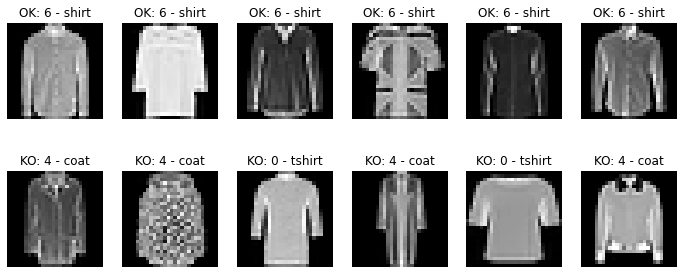

In [ ]:
#run visual inspection for class 6 - shirts
visual_err_inspection(y_val, lr_y_val_pred, 6, 6)

The previous output shows some true shirt predictions, in the first row, and in the second row we can see some mispredictions, and its true label. We can see that for example, the second and third mispredictions are a pullover, and a tshirt, but at first sight might seem like a shirt, at least in this image resolution. 

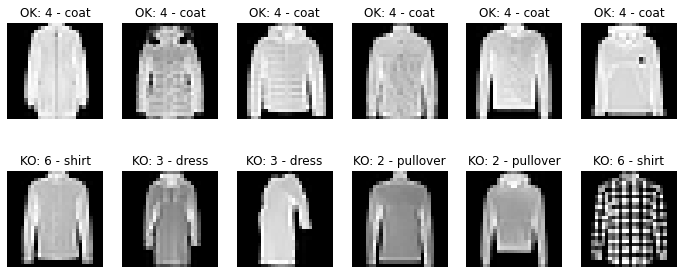

In [ ]:
#run visual inspection for class 4 - coats
visual_err_inspection(y_val, lr_y_val_pred, 4, 6)

One issue related to this dataset, is that we do not have a huge data set, as we are talking of around 40K images. Let's take a look to the 'learning curve' to assess if in the scenario of having more data the performance would improve.

# Ensemble models

## RF model

In [ ]:
#train a RF model on this data

CPU times: user 5min 49s, sys: 566 ms, total: 5min 49s
Wall time: 2min 57s
This model has a 85.91% acc. score @ Validation


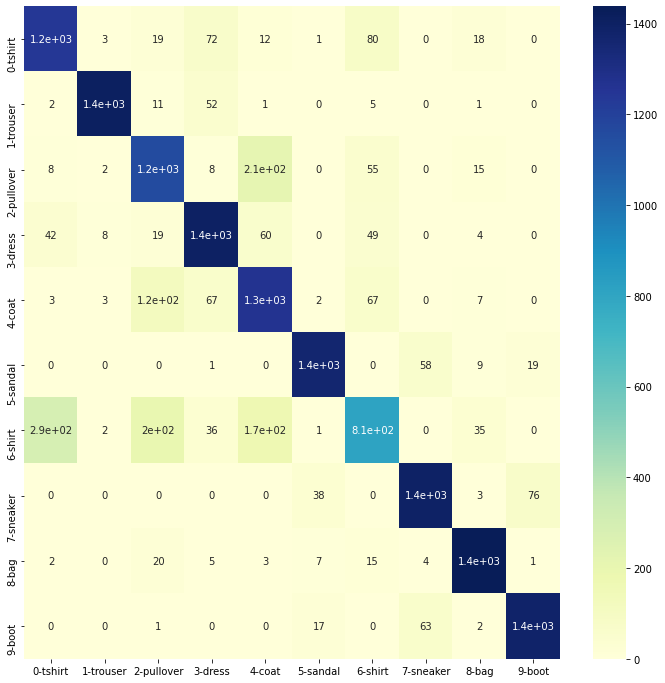

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=25, n_jobs=4)
#train the model
%time rf.fit(X_train, y_train)

plot_conf_matrix(y_val, rf.predict(X_val), 'Validation')

In [ ]:
print_acc(y_train, rf.predict(X_train), 'Train')

This model has a 89.42% acc. score @ Train


## XGboost

In [ ]:
#train a xgboost model on this data
from xgboost import  XGBClassifier
xgb = XGBClassifier(max_depth=5, n_estimators=300, learning_rate=0.03, n_jobs=4)
%time xgb.fit(X_train, y_train)

CPU times: user 1h 31min 10s, sys: 9.34 s, total: 1h 31min 19s
Wall time: 46min 27s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=4,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

This model has a 87.87% acc. score @ Validation


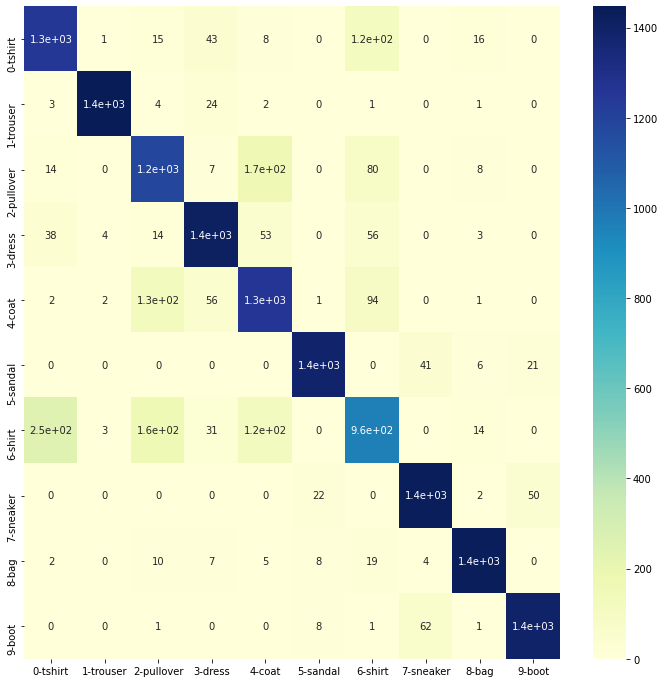

In [ ]:
plot_conf_matrix(y_val, xgb.predict(X_val), 'Validation')

In [ ]:
print_acc(y_train, xgb.predict(X_train), 'Train')

This model has a 93.46% acc. score @ Train


## Basic model ensemble

In [ ]:
lr_val_probs, rf_val_probs, xgb_val_probs = lr.predict_proba(X_val), rf.predict_proba(X_val), xgb.predict_proba(X_val)

In [ ]:
def show_probs_dist(prob_pred, label_dictionary = label_dict):
    '''
    Given the probabilities prediction of a model, for a set of labels, show how all look together 
    '''
    for i in range(prob_pred.shape[1]):
        plt.hist(prob_pred[:,i], alpha=0.4, label = label_dictionary[i])
    plt.legend(loc='upper right')

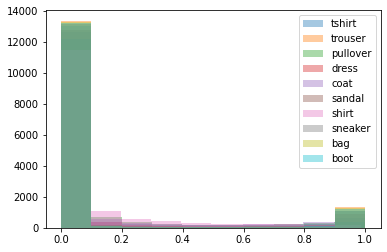

In [ ]:
show_probs_dist(lr_val_probs)

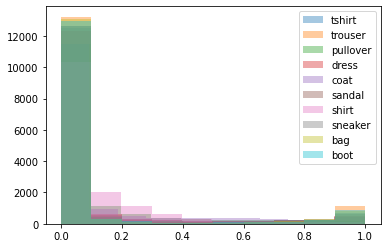

In [ ]:
show_probs_dist(rf_val_probs)

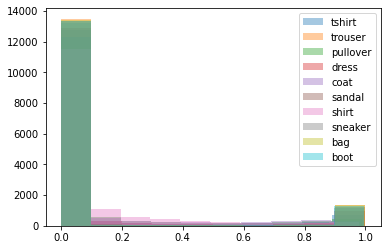

In [ ]:
show_probs_dist(xgb_val_probs)

In [ ]:
def show_probs_dist_label(prob_pred_list, preds_names_list, label_picked, label_dictionary = label_dict):
    '''
    Given a list of probablities prediction for different models, select one label an plot all models 
    probabilities prediction for that label
    '''
    for i in range(len(prob_pred_list)):
        plt.hist(prob_pred_list[i][:,label_picked], alpha=0.5, label = preds_names_list[i])
    plt.legend(loc='upper right')
    plt.title('Probability distribution for ' + label_dict[label_picked])
    plt.show()

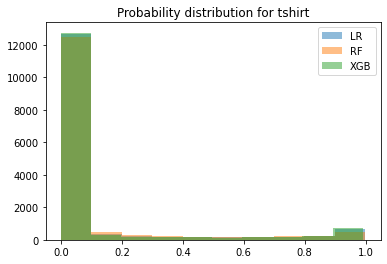

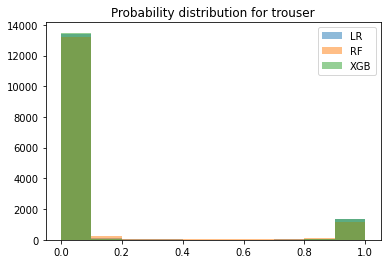

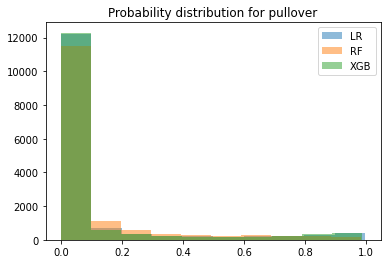

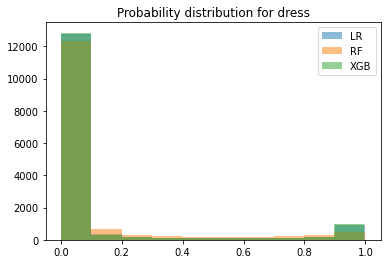

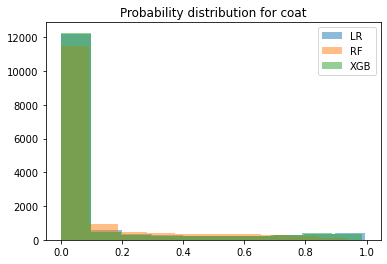

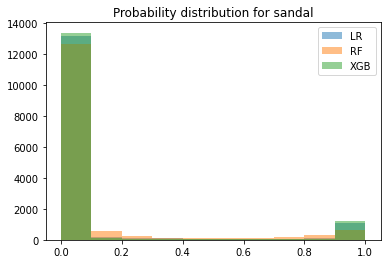

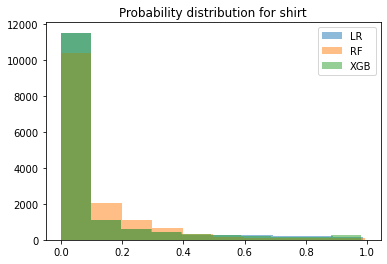

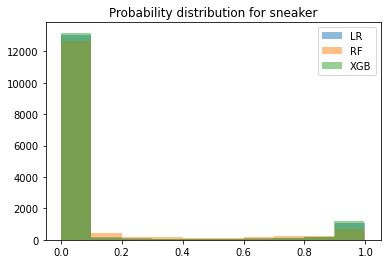

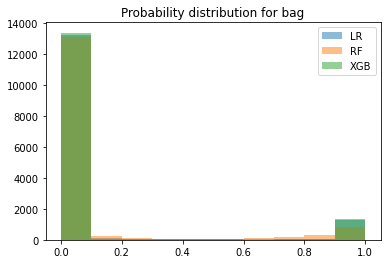

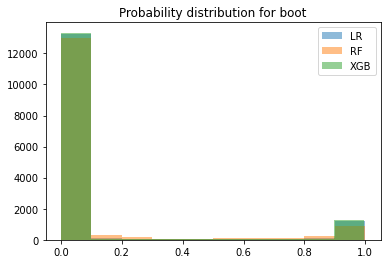

In [ ]:
list_probs = [lr_val_probs, rf_val_probs, xgb_val_probs]
list_names = ['LR', 'RF', 'XGB']
for i in label_dict.keys():
    show_probs_dist_label(list_probs, list_names, i)

This model has a 87.93% acc. score @ Validation


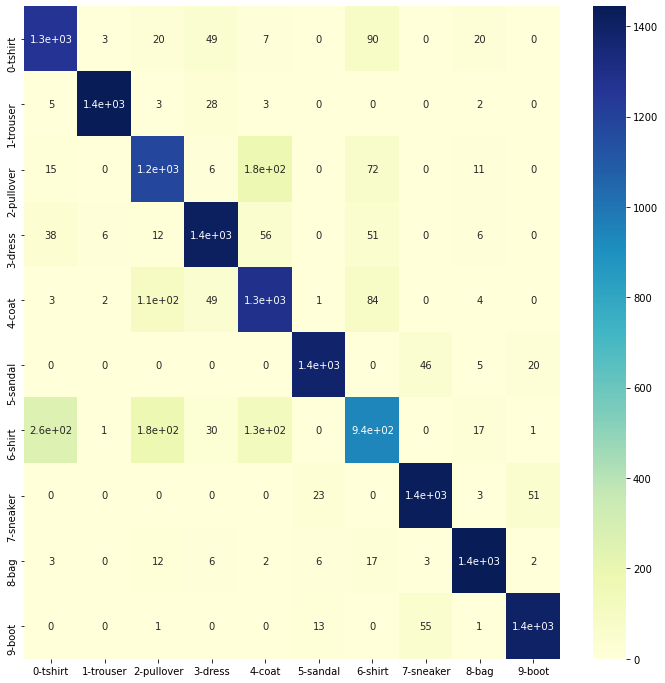

In [ ]:
#average all predictions
comb_val_probs = (lr_val_probs + rf_val_probs + xgb_val_probs) / 3
#pick the column idx with the max probability
comb_val_pred = comb_val_probs.argmax(axis=1)
plot_conf_matrix(y_val, comb_val_pred, 'Validation')

This model has a 88.07% acc. score @ Validation


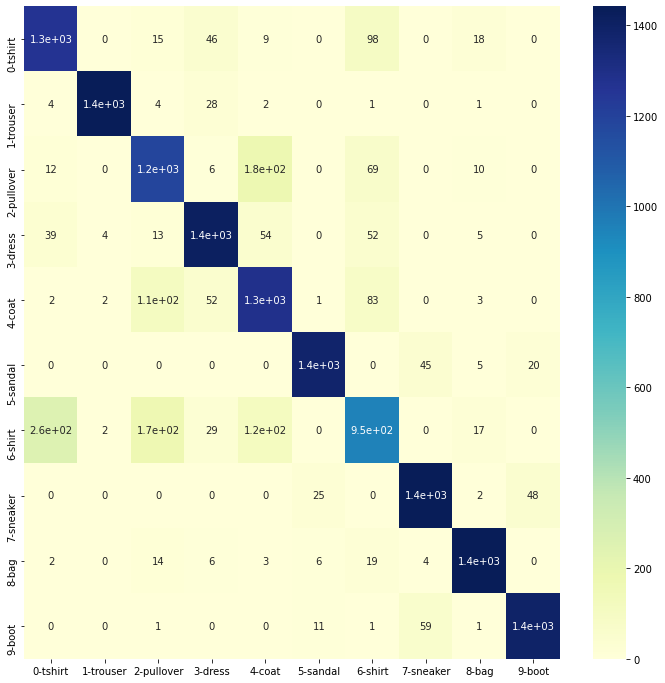

In [ ]:
weighted_val_probs = (0.2*lr_val_probs + 0.3*rf_val_probs + 0.5*xgb_val_probs) / 3
weighted_val_pred = weighted_val_probs.argmax(axis=1)
plot_conf_matrix(y_val, weighted_val_pred, 'Validation')

## Dimensionality reduction

In [ ]:
from sklearn import decomposition
N_PCA_COMP = 50
pca_est = decomposition.PCA(n_components=N_PCA_COMP, svd_solver='randomized', whiten=True, random_state=42)

In [ ]:
pca_est.fit(X_val)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=True)

In [ ]:
pca_est.explained_variance_ratio_

array([0.29022466, 0.17815334, 0.05992301, 0.04989051, 0.03871945,
       0.03453039, 0.02381993, 0.01917166, 0.01356012, 0.01312577,
       0.0098936 , 0.00911983, 0.00760971, 0.0065818 , 0.00612134,
       0.00582739, 0.00561698, 0.00518606, 0.00456376, 0.00452883,
       0.00424258, 0.00407455, 0.0037783 , 0.00373001, 0.00358398,
       0.00352628, 0.00334599, 0.00324395, 0.00308168, 0.00296303,
       0.00277919, 0.00268347, 0.00260312, 0.00253551, 0.00251944,
       0.00237084, 0.00232137, 0.00220684, 0.00216555, 0.00208367,
       0.00203952, 0.00196469, 0.00193382, 0.00182828, 0.00177245,
       0.00171626, 0.00166483, 0.00164417, 0.0016188 , 0.00151489])

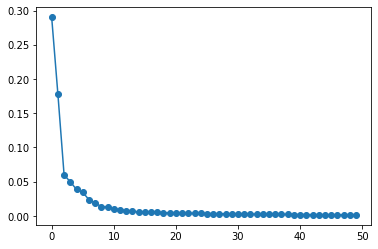

In [ ]:
plt.scatter([i for i in range(N_PCA_COMP)], pca_est.explained_variance_ratio_)
plt.plot([i for i in range(N_PCA_COMP)], pca_est.explained_variance_ratio_)

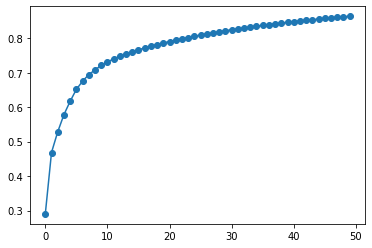

In [ ]:
plt.scatter([i for i in range(N_PCA_COMP)], pca_est.explained_variance_ratio_.cumsum())
plt.plot([i for i in range(N_PCA_COMP)], pca_est.explained_variance_ratio_.cumsum())

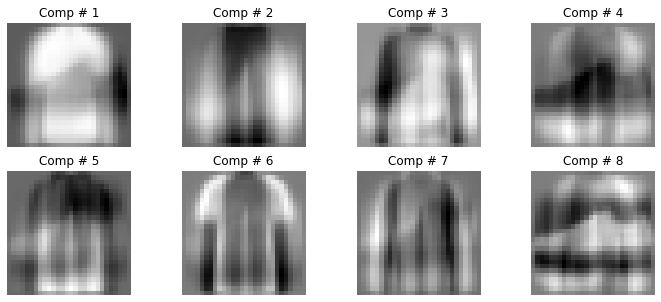

In [ ]:
plt.figure(figsize=(12,5))
plt.plot([2, 4])

for i in range(4):
    ax = plt.subplot(2, 4, i + 1)
    ax.set_title("Comp # " + str(i+1))
    plt.axis('off')
    plt.imshow(pca_est.components_[i, :].reshape(28, 28), cmap= 'gray')

    ax2 = plt.subplot(2, 4, i + 4 + 1)
    ax2.set_title("Comp # " + str(i + 4 + 1))
    plt.axis('off')
    plt.imshow(pca_est.components_[i + 4, :].reshape(28, 28), cmap= 'gray')

In [ ]:
#transorm the original images in the PCA space
X_val_pca = pca_est.transform(X_val)

In [ ]:
#work with just a sample
N_samps = 1000
y_val_ = y_val.reset_index(drop=True)
sample = X_val_pca[:N_samps, :3]

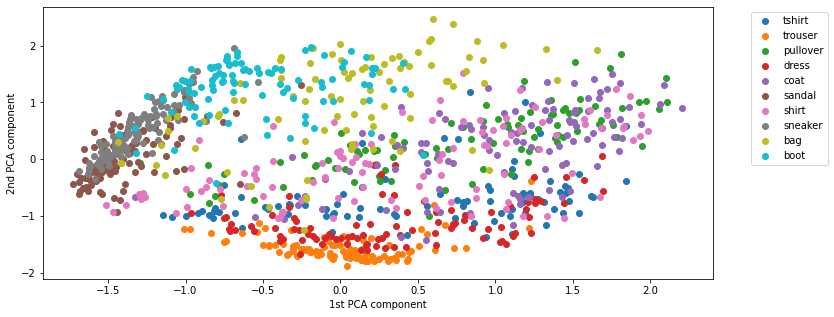

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(111)
for lab in np.unique([a for a in label_dict.keys()]):
    ix = np.where(y_val_[:N_samps] == lab)
    plt.scatter(sample[:, 0][ix], sample[:, 1][ix], label = label_dict[lab])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')
plt.show()

## CNN model

In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, Activation
from keras.layers.normalization import BatchNormalization

#CONV-> BatchNorm-> RELU block
def conv_bn_relu_block(X, n_channels, kernel_size=(3, 3)):
    X = Conv2D(n_channels, kernel_size)(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    return X

#simple keras model
def fashion_cnn_model(input_shape):
    X_input = Input(input_shape)
    #zeropad
    X = ZeroPadding2D((1, 1))(X_input)
    #run a CONV -> BN -> RELU block
    X = conv_bn_relu_block(X, 32)
    #Maxpooling and dropout
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.3)(X)
    #run another CONV -> BN -> RELU block
    X = ZeroPadding2D((1, 1))(X)
    X = conv_bn_relu_block(X, 64)
    #Maxpooling and dropout
    X = MaxPooling2D((2, 2))(X)
    X = Dropout(0.4)(X)
    #run another CONV -> BN -> RELU block
    #X = ZeroPadding2D((1, 1))(X)
    X = conv_bn_relu_block(X, 128)
    #dropout
    X = Dropout(0.3)(X)
    #flatten
    X = Flatten()(X)
    #dense layer
    X = Dense(len(label_dict.keys()), activation='softmax')(X)
    #output model
    model = Model(inputs = X_input, outputs = X, name='fashion_cnn_model')

    return model

In [ ]:
fashionModel = fashion_cnn_model((28, 28, 1,))

In [ ]:
#show the model architecture summary
fashionModel.summary()

Model: "fashion_cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)  

In [ ]:
fashionModel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
#reshape the input data
X_train_ = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_val_ = X_val.values.reshape(X_val.shape[0], 28, 28, 1)

In [ ]:
from keras.utils import to_categorical
#fit the model
fashionModel.fit(x = X_train_ , y = to_categorical(y_train) ,epochs = 50, batch_size = 64)

Epoch 1/50
704/704 [==============================] - 84s 120ms/step - loss: 0.5700 - accuracy: 0.7942
Epoch 2/50
704/704 [==============================] - 84s 119ms/step - loss: 0.4020 - accuracy: 0.8553
Epoch 3/50
704/704 [==============================] - 83s 118ms/step - loss: 0.3607 - accuracy: 0.8690
Epoch 4/50
704/704 [==============================] - 83s 117ms/step - loss: 0.3243 - accuracy: 0.8810
Epoch 5/50
704/704 [==============================] - 87s 124ms/step - loss: 0.3078 - accuracy: 0.8886
Epoch 6/50
704/704 [==============================] - 82s 117ms/step - loss: 0.2921 - accuracy: 0.8940
Epoch 7/50
704/704 [==============================] - 82s 116ms/step - loss: 0.2835 - accuracy: 0.8963
Epoch 8/50
704/704 [==============================] - 83s 117ms/step - loss: 0.2707 - accuracy: 0.9014
Epoch 9/50
704/704 [==============================] - 82s 116ms/step - loss: 0.2657 - accuracy: 0.9030
Epoch 10/50
704/704 [==============================] - 82s 116ms/step - l

In [ ]:
#evaluate the model performance in the validation set
evs = fashionModel.evaluate(x = X_val_, y = to_categorical(y_val))
#show the accuracy metric
print(evs[1])

469/469 [==============================] - 8s 16ms/step - loss: 0.2264 - accuracy: 0.9203
0.9202666878700256


### CNN model inspection

This model has a 92.03% acc. score @ Validation


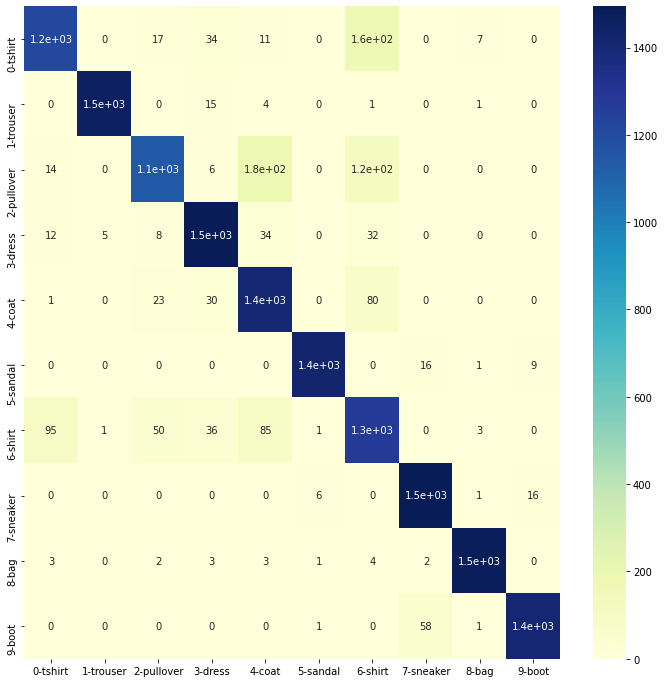

In [ ]:
#label prediction
cnn_y_val_pred = fashionModel.predict(X_val_).argmax(axis=-1)
#plot confusion matrix
plot_conf_matrix(y_val, cnn_y_val_pred, 'Validation')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, cnn_y_val_pred, target_names=[v for v in label_dict.values()]))

              precision    recall  f1-score   support

      tshirt       0.91      0.84      0.87      1452
     trouser       1.00      0.99      0.99      1482
    pullover       0.92      0.78      0.84      1461
       dress       0.92      0.94      0.93      1585
        coat       0.81      0.91      0.86      1540
      sandal       0.99      0.98      0.99      1454
       shirt       0.76      0.83      0.79      1550
     sneaker       0.95      0.98      0.97      1512
         bag       0.99      0.99      0.99      1495
        boot       0.98      0.96      0.97      1469

    accuracy                           0.92     15000
   macro avg       0.92      0.92      0.92     15000
weighted avg       0.92      0.92      0.92     15000



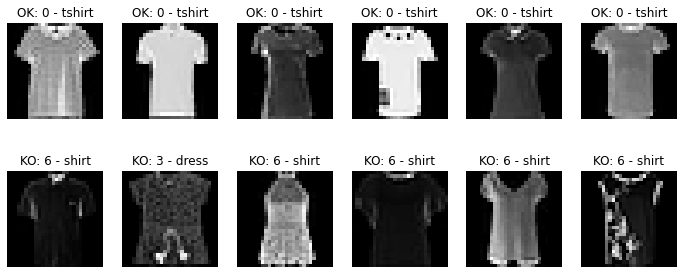

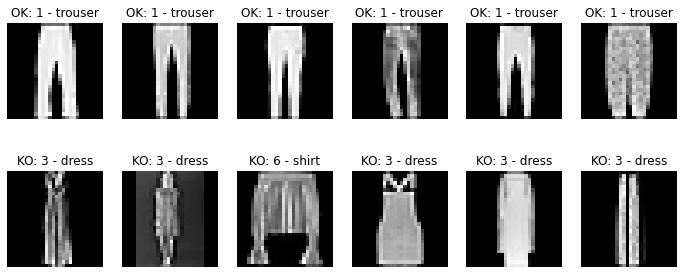

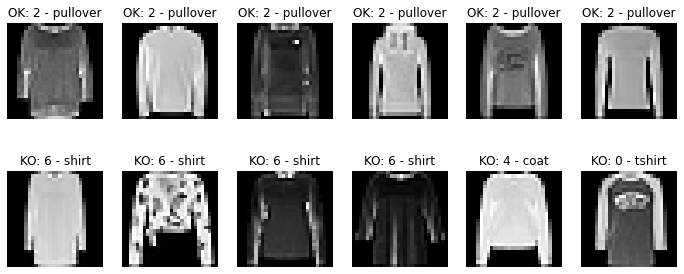

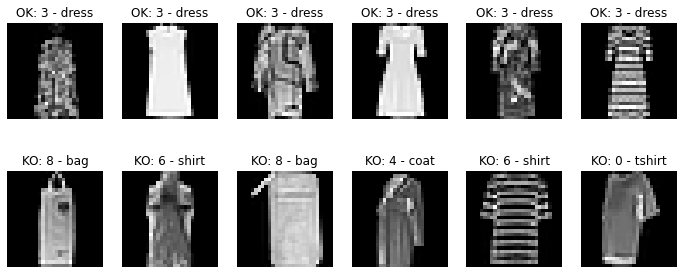

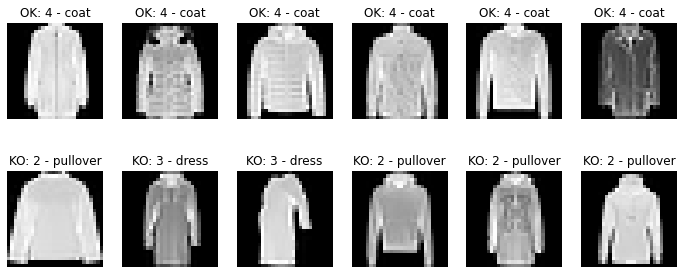

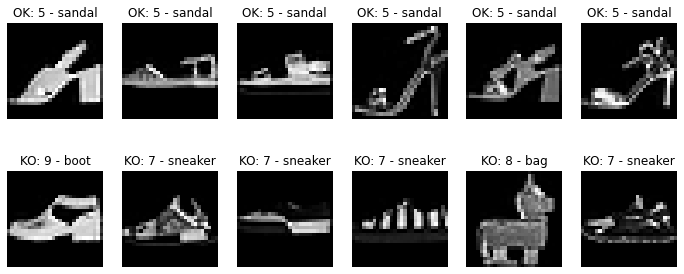

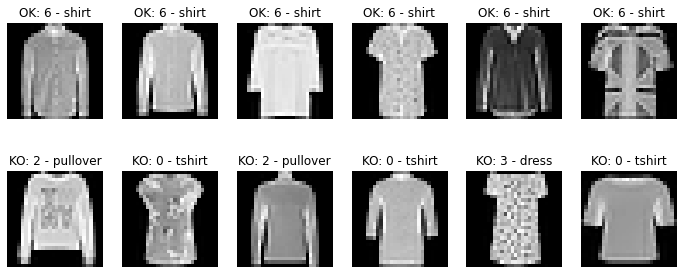

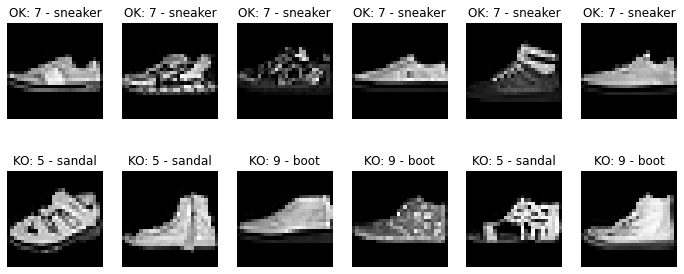

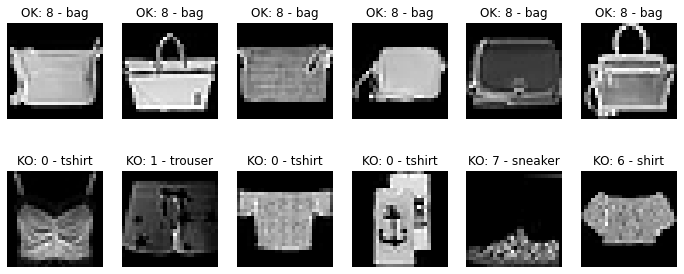

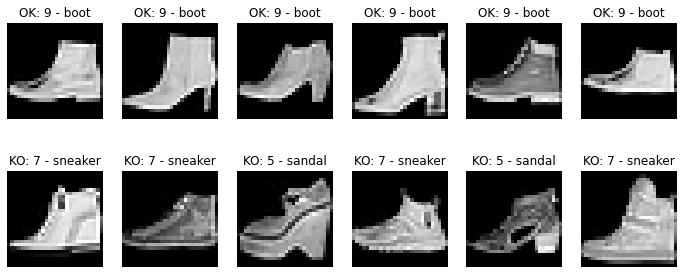

In [ ]:
#run visual inspection for all classes
for i in label_dict.keys():
    visual_err_inspection(y_val, cnn_y_val_pred, i, 6)

### Recommendation generation using an intermediate layer as descriptor

In [ ]:
#get the output of the last conv layer
#we will use it as description vector
intermediate_layer_model = Model(inputs = fashionModel.input,
                                 outputs = fashionModel.get_layer('conv2d_3').output)

In [ ]:
#generate the output for all observations in validation set
intermediate_output = intermediate_layer_model.predict(X_val_)
#the cosine distance is applied to 1D vectors
intermediate_output_res = intermediate_output.reshape(15000, 128*5*5)

In [ ]:
import scipy

def get_N_rec(idx_eval, N_recoms):
    eval_row = X_val_[idx_eval, :, :, :].reshape((1, 28, 28, 1))
    eval_activ =  intermediate_layer_model.predict(eval_row)
    #apply the cosine distance to all rows
    distance = np.apply_along_axis(scipy.spatial.distance.cosine, 1, intermediate_output_res, eval_activ.reshape(128*5*5))
    #get the N_recoms with the lowest distance
    #drop the first, as it is the row to be evaluated
    idx_recoms = distance.argsort()[1:N_recoms+1]
    #pass this idx to the idx space of the original datset
    out = [X_val.index[i] for i in idx_recoms]
    #also convert the original idx
    original = X_val.index[idx_eval]
    return out, original

#give me 6 recommendations for idx 50
idx_rec, orig = get_N_rec(50, 6)

In [ ]:
import math
def plot_recommendations(idx_eval, N_recoms):
    idx_rec, orig = get_N_rec(idx_eval, N_recoms)
    fig = plt.figure(figsize=(10,10))
    N_cols_rec = math.ceil(1 + len(idx_rec) / 2)
    ax1 = fig.add_subplot(2, N_cols_rec,1)
    ax1.set_title('Original item')
    plot_image_pd(idx_to_pixseries(train_df, orig))
    for i in range(len(idx_rec)):
        ax_ = fig.add_subplot(2, N_cols_rec, i+2)
        ax_.set_title('Recomendation #' + str(i+1))
        plot_image_pd(idx_to_pixseries(train_df, idx_rec[i]))

#draw 6 recommendations for idx 50
plot_recommendations(50, 6)

In [ ]:
#draw 6 recommendations for idx 4
plot_recommendations(4, 6)

In [ ]:
#draw 6 recommendations for idx 4242
plot_recommendations(4242, 6)

In [ ]:
#draw 6 recommendations for idx 101
plot_recommendations(101, 6)

##**Observations and Findings**##
##Introduction##
We have the label column, and then the 784 pixel colums (we are working with 28x28 images)

These are the labels in the dataset:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

##Visualization Obsverations##
Then we have looked at the first image in the train dataset. It seems to be a t-shirt...it has some texture, but is very hard to see the details, as we are working with quite low-res images. Then we have looked at one example of each label in the dataset.Looking at first sight, it looks like non trivial task, as for example, shirt, coat, and pullover can be very similar at this resolution. Sandal, sneaker, and boot also seem very similar. Fianlly after looking at some more examples of each class, we checked if there are big intra-class variances. but how does each average label image look like? is the question we wanted to an answer for.

##Baseline Model Results##
We trained a logistic regression as a baseline model. This baseline model has a 85.13% accuracy score. We can see in the confusion matrix, that the main errors come from the tshirt, coat, pullover and tshirt classes. We looked at some of these errors closely. This baseline model has a 86.64 percent accuracy in the train set, slightly better than at validation set, but it does not seem to be any overfit. The previous output shows some true shirt predictions, in the first row, and in the second row we can see some mispredictions, and its true label. We can see that for example, the second and third mispredictions are a pullover, and a tshirt, but at first sight might seem like a shirt, at least in this image resolution. One issue related to this dataset, is that we do not have a huge data set, as we are talking of around 40K images. Then if we take a look at the 'learning curve' to assess if in the scenario of having more data the performance would improve.

**In the next section we trained ensemble models, to see if we can improve the baseline model performance using ensemble models, specifically RandomForest and XGboost.**

##Built Random Forest Model and XGboost Model##
The RandomForest model achieves just 1 percentage point better accuracy at validation set compared to the baseline model. It might be improved as, it might have a little overfit, as the train set accuracy is around 4 points better.

Later we combined the output of these three models, and saw if there is any improvement. Then saw how the prediction probabilities look like. We cannot see a big difference in shape looking at all labels at the same. Immediately we saw what happens if we focus in some specific labels. Looking label by label, we can see that all label probabilities shapes look pretty much the same, so no normalizations have be done to compare these probabilities. In this case, the average of all scores gives no better result. Tried to set some weights, giving a bit more importance to the xgb prediction, as it was the model with the best performance. Well, in this case we get a 0.1% accuracy improvement, that performance boost can result in a better model.

##Dimensionality Reduction Approach##
Even if this dataset contains low resolution images (resulting in a non too high dimensional problem), we used PCA and saw if there is any accuracy improvement in the resulting lower dimensional space. We also took a look at the explained variance of the 50 components we used to fit this PCA. We can see that the curve has an 'elbow' shape, meaning that the first components (first 10) explain most of the variance, while the rest explain much less variance.Here we can see the cumulative explained variance of the components. We then visualize the first 8 components of the transformation in the original image space. Looking at the components, we can see that for example, the first component shows a mix of sneaker, and shirt/pullover. The sneaker takes much lower values, while the shirt/pullover take positive values. We can see how on the top left side we have mainly sandals, sneakers, and boots. On the very bottom side we have trousers, that in these first two components are very similar to dresses. Bags are spread on the top side of the plot, some of them having collisions with some boots. On these two first components, t-shirts, pullovers, coats and shirts live in the same region. Looking at the component visualization, the second component had a 'negative' trouser on it. We can see now in this scatter plot, that trousers are in a region where the 2nd PCA component takes negative values, so that the 'reconstruction' from these PCA components will result in a 'positive' trouser.

##CNN Model and Recommender System observations##
Finally we trained a CNN model, using keras. This model, without much adjustment reaches a 93.1% accuracy socore in the validation set, 5.3 points better than the XGboost model, and almost 8 points better than the baseline model! Looking at the confusion matrix, we can see that there much less errors in all labels. Most of the errors belong to the shirt/tshirt/pullover/coat classes. Looking at the classification report, we can see that trouser, bag, and boot classes have almost a perfect performance. We can also confirm, that the tshirt, coat and shirt classes have the worst performance (but always above a 0.81 f1-score, which is not bad either!). Let's now run a visual inspection for all classes. Looking at the error inspection, we can see that some of the errors would be really hard to avoid, with the data we currently have. For example, looking at the errors in the boot label, we can see some sneakers and sandals that look quite much to a boot.